In [8]:
!python yolov5/train.py --img 640 --batch 16 --epochs 50 --data yolov5/models/data.yaml --weights yolov5s.pt --cache

In [1]:
# Import necessary libraries For json_min format
import json
import os

def convert_label_studio_to_yolo(json_file_path, image_folder_path):
    """
    This code converts annotations in the Label Studio JSON format to the YOLO format, which is used for object detection tasks.
    """
    
    # Load the JSON file
    with open(json_file_path, 'r') as f:
        data = json.loads(f.read().replace('\n', '').replace('\r', ''))

    # Get image dimensions
    img_width = {}
    img_height = {}
    for i, image in enumerate(data["images"]):
        image_path = os.path.join(image_folder_path, image['file_name'].replace('/3/','/').split('/')[1])
        img_width[i] = image["width"]
        img_height[i] = image["height"]

    # Loop through annotations
    for annotation in data["annotations"]:
        image_id = annotation["image_id"]
        image_path = os.path.join(image_folder_path, data["images"][image_id]['file_name'].replace('/3/','/').split('/')[1])
        
        # Get object class name and bounding box coordinates
        class_name = annotation["category_id"]
        left = annotation["bbox"][0]
        top = annotation["bbox"][1]
        width = annotation["bbox"][2]
        height = annotation["bbox"][3]

        # Convert bounding box coordinates to YOLO format
        x_center = left + (width / 2)
        y_center = top + (height / 2)
        x_rel = x_center / img_width[image_id]
        y_rel = y_center / img_height[image_id]
        width_rel = width / img_width[image_id]
        height_rel = height / img_height[image_id]

        # Write to YOLO format file
        yolo_line = f"{class_name} {x_rel:.6f} {y_rel:.6f} {width_rel:.6f} {height_rel:.6f}\n"
        yolo_file_path = os.path.join(image_path.split('.jpg')[0].replace('images','labels')+ ".txt")
        with open(yolo_file_path, 'a') as yolo_file:
            yolo_file.write(yolo_line)


This code is a Python function `convert_label_studio_to_yolo` that takes two arguments: `json_file_path` and `image_folder_path`. The purpose of this function is to convert the annotation data in the Label Studio format to the YOLO format. 

The function first reads the annotation data from the JSON file specified by `json_file_path` using the `json` library, and stores the data in the `data` variable. Then, it loops through each image in the dataset and retrieves its dimensions (width and height), which are stored in dictionaries indexed by the image's index.

Next, the function loops through each annotation in the dataset, and if the annotation belongs to the current image, it retrieves the object class name and bounding box coordinates. It then converts the bounding box coordinates to the YOLO format, which involves calculating the x and y coordinates of the box center as well as the width and height of the box relative to the dimensions of the image. 

Finally, the function writes the YOLO-formatted bounding box information to a text file with the same base name as the image, but with a `.txt` extension, and stored in a folder named `labels` inside the `image_folder_path`. The function appends the YOLO-formatted bounding box information to the text file using the `a` mode of the `open` function.

In [2]:
ls_folder_path = r'label_studio_2'

# Loop through each file in the directory
for filename in os.listdir(ls_folder_path):
    if '.json' in filename:
        convert_label_studio_to_yolo(os.path.join(ls_folder_path,filename), os.path.join(ls_folder_path,filename.replace('.json','').replace('result','images')))

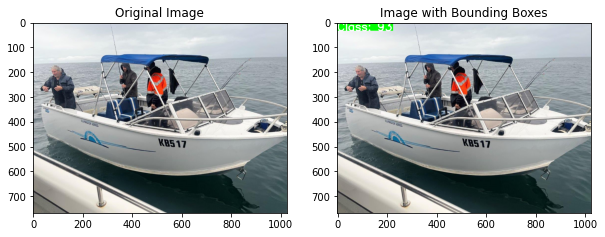

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Specify the paths to the image and text file
image_path = r"label_studio_2\images_open2\2f609ae8-0697F00000xbqapQAA-April-19-2022-10_13_15-AEST-1000.jpg"
text_path = r"label_studio_2\labels_open2\2f609ae8-0697F00000xbqapQAA-April-19-2022-10_13_15-AEST-1000.txt"

# Load the image
img = cv2.imread(image_path)

# Read the text file
with open(text_path, 'r') as f:
    lines = f.readlines()

# Draw bounding boxes on the image
for line in lines:
    class_id, x, y, w, h = map(float, line.strip().split())
    x1, y1 = int(x - w/2), int(y - h/2)
    x2, y2 = int(x + w/2), int(y + h/2)
    color = (0, 255, 0)  # Green color
    thickness = 8
    
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

    # Add the class label to the bounding box
    label = f"Class: {int(class_id)}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    label_color = (255, 255, 255)  # White color for the label text
    label_thickness = 3
    label_size = cv2.getTextSize(label, font, font_scale, label_thickness)[0]
    cv2.rectangle(img, (int(x), int(y)), (int(x+label_size[0]), int(y+label_size[1])), color, cv2.FILLED)
    cv2.putText(img, label, (int(x), int(y+label_size[1])), font, font_scale, label_color, label_thickness)


# Display the original image and the image with bounding boxes side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image with Bounding Boxes')
plt.show()

This code loads an image and its associated text file that contains bounding box coordinates and class labels, and then draws the bounding boxes on the image using OpenCV. It then displays the original image and the image with bounding boxes side by side using Matplotlib.